In [1]:
from gensim import models

from IPython.display import display, HTML

In [2]:
m = models.word2vec.Word2Vec.load("../models/word2vec/all_pages.txt")

In [3]:
questions = [ "philosophy", "science", "religion", "knowledge", "wisdom", "love" ]

partitions = [ [["philosophy"],[]],
              [["continental_philosophy"],["analytic_philosophy"]],
              [["analytic_philosophy"],["continental_philosophy"]]]

In [4]:
def q(positive, negative, model, topn=10):
  try:
    result = model.most_similar(positive=positive, negative=negative, topn=topn)
  except:
    result = []
  
  return result

In [5]:
def print_questions(answers):
    html = "<table>"

    html += """
    <tr>
      <td></td>
      <th>philosophy</th>
      <th>continental philosophy</th>
      <th>analytic philosophy</th>
    </tr>
    """
    
    for question, control, analytic, continental in answers:
        html += "<tr><td style=\"width: 100px; text-align: center; \"><h3>%s</h3></td>" % question
        html += "<td><ul>"
        html += "\n".join([ "<li>%s</li>" % word for word, score in control ])
        html += "</ul></td>"
        html += "<td><ul>"
        html += "\n".join([ "<li>%s</li>" % word for word, score in analytic ])
        html += "</ul></td>"
        html += "<td><ul>"
        html += "\n".join([ "<li>%s</li>" % word for word, score in continental ])
        html += "</ul></td>"
        html += "</tr>"
    
    html += "</table>"

    display(HTML(html))

print_questions([ ([question]+[ q(p[0]+[question], p[1], m, 30) for p in partitions]) for question in questions ])

,philosophy,continental philosophy,analytic philosophy
philosophy,psychology philosophy_science metaphysics mathematics ethics moral_philosophy philosophy_religion theology philosophical political_philosophy logic analytic_philosophy phenomenology aesthetics physics medicine hegel philosophy_mathematics epistemology sociology thought heidegger philosophy's philosophy_language whitehead psychoanalysis philology hegel's_philosophy contemporary_philosophy natural_sciences,philosophy_religion philosophy_science psychology ethics political_philosophy aesthetics western_philosophy theology contemporary_philosophy phenomenology psychoanalysis political_thought moral_philosophy philosophical metaphysics new_reasoner sociology philosophy_language linguistics mathematics existentialism philology german_idealism philosophers philosophy_mathematics medicine anthropology danto's pragmatism astronomy,mathematics metaphysics psychology logic moral_philosophy philosophy_science theology ethics thesis natural_sciences physics philosophical hegel medicine kant epistemology natural_science heidegger philosophy_religion phenomenology political_philosophy subject knowledge husserl philosophy's philosophy_mathematics late? degree whitehead scepticism
science,psychology philosophy_science ethics mathematics medicine moral_philosophy physics philosophy_religion metaphysics sciences social_sciences sociology natural_sciences biology aesthetics logic psychoanalysis phenomenology political_philosophy theology analytic_philosophy linguistics anthropology social_science contemporary_philosophy astronomy natural_science philology philosophy_mathematics economics,sciences anthropology technology arts social_sciences philosophy_science psychology ethics geography humanities science_technology cultural_studies psychiatry architecture psychoanalysis linguistics medicine human_sciences archaeology philosophy_religion political_science cognitive_science sociology contemporary_philosophy social_science political_thought biology artificial_intelligence natural_history perspectives,psychology natural_sciences mathematics physics medicine biology philosophy_science ethics logic knowledge sciences social_sciences natural_science moral_philosophy metaphysics technology scientific applied foundations rationality social_science late? sociology thesis geography scepticism understanding trinity anthropology empirical
religion,theology ethics political_philosophy philosophy_religion judaism metaphysics mysticism enlightenment hegel's_philosophy philosophy_science moral_philosophy contemporary_philosophy christianity christian_theology psychology analytic_philosophy science humanism medicine eschatology spirituality theosophy jurisprudence late? existentialism apologetics philosophy's philosophical_tradition natural_science aesthetics,judaism christian christianity spirituality religions culture jewish religious humanism theology enlightenment reformation political_thought faith roman_catholicism christian_theology islam hinduism oriental christian_right politics parliament_world's evangelical eschatology post-colonial_theory buddhist secular heritage renaissance history_religions,theology christianity faith judaism christian atheism orthodoxy doctrine dogma morals reason enlightenment late? trinity divinely_revealed mysticism morality orthodox secular divinity eschatology vocation paganism belief ethics religious revelation rationalist catholicism scepticism
knowledge,metaphysics psychology ethics logic natural_sciences mathematics natural_science understanding scepticism philosophy's moral_philosophy skepticism biology theology epistemology phenomenology physics philosophical perception learning subject philosophy_religion mysticism objectivity practical astronomy science philosophy_science distinction thinking,understanding learning meditation human_nature scepticism dimension creativity imagination consciousness christian_faith sensibility spirituality natural_science o

## Principal Component Analysis

In [6]:
import numpy as np

In [7]:
from sklearn.decomposition import PCA

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull

In [9]:
def plot_words(ax, model, s, label=False, legend=False, topn=10):
  
  ax.set_title(s[0][0][0])
  ax.axis('equal')

  s = [ (p+[question],n,c) for (p,n,c) in s for question in questions  ]
  
  points_label = {}
  groups = {}
  
  for p, n, c in s:
    Z = model.transform(np.array([ m[w] for w,s in q(p,n,m,topn) ]))

    hull = ConvexHull(Z)

    for simplex in hull.simplices:
      ax.plot(Z[simplex, 0], Z[simplex, 1], '-', color=c, alpha=0.3)

    simplex_x, simplex_y = ([], [])

    for simplex in hull.vertices:
      simplex_x.append(Z[simplex, 0])
      simplex_y.append(Z[simplex, 1])

    if label:
      ax.text(np.mean(simplex_x), np.mean(simplex_y), p[1], color=c, horizontalalignment='center', verticalalignment='center',)
      
    groups[p[0]] = ax.fill(simplex_x, simplex_y, '', color=c, alpha=0.1)

    Z_ = zip(*Z)
    
    points_label[p[0]] = ax.scatter(Z_[0], Z_[1], lw=1, color=c, alpha=0.8)

  if legend:
    ax.legend([ v[0] for v in groups.values() ] \
                + [ v for v in points_label.values() ],\
              [ "topics of %s" % k for k in groups.keys() ]\
                + [ "words of %s" % k for k in points_label.keys() ],\
             loc='lower right')

## Global space

In [10]:
temp = [ q(partition[0] + [question], partition[1], m, 30) for partition in partitions for question in questions ]
temp = reduce(lambda a,b: a+b, temp)
temp = [ w for w,s in temp ]

A = np.array(map(lambda x: m[x], questions + temp))

In [11]:
pca = PCA(n_components=2)
pca = pca.fit(A)

In [13]:
s1 = partitions[0] + [ ".70" ]
s2 = partitions[1] + [ "red" ]
s3 = partitions[2] + [ "blue" ]

## Layers

### n = 10

In [25]:
current_topn=10

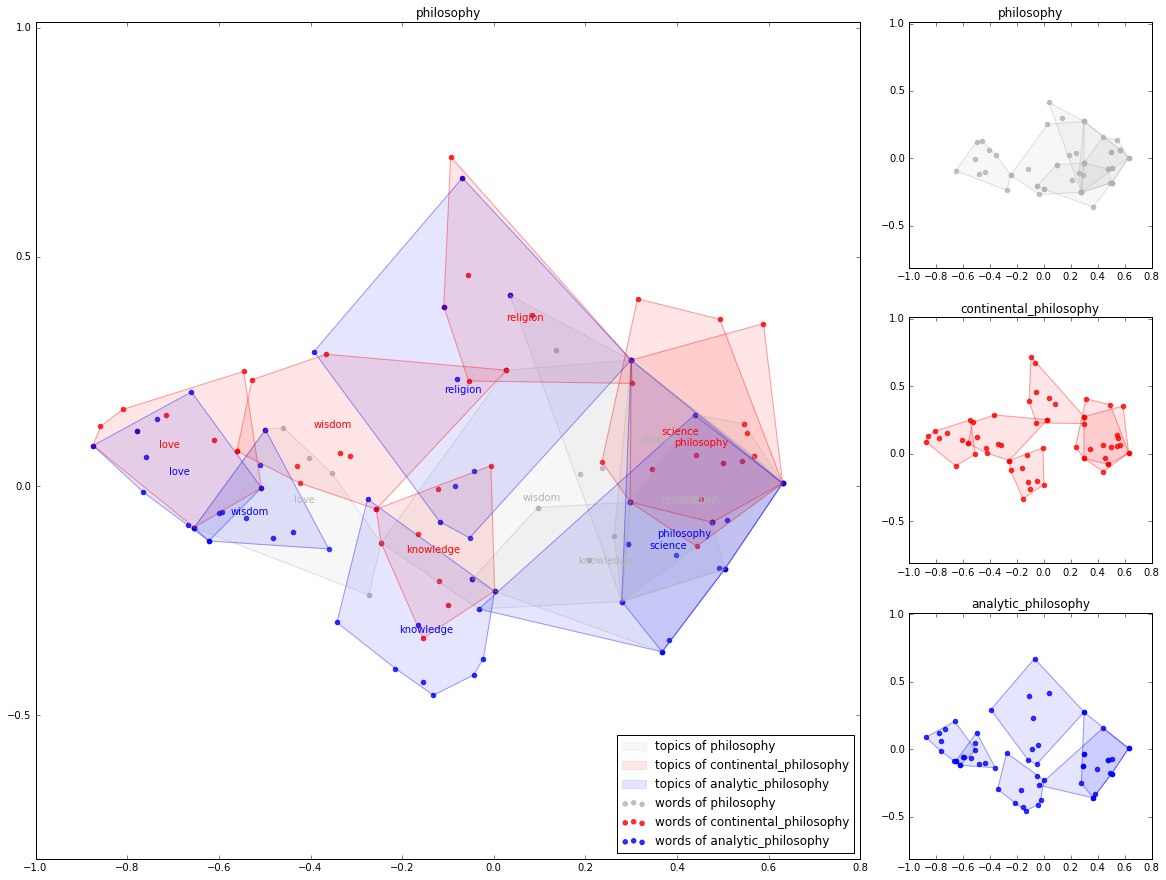

In [26]:
fig = plt.figure(figsize=(20,15))

ax1 = plt.subplot2grid((3,4), (0, 0), rowspan=3, colspan=3)
ax2 = plt.subplot2grid((3,4), (0, 3), sharex=ax1, sharey=ax1)
ax3 = plt.subplot2grid((3,4), (1, 3), sharex=ax1, sharey=ax1)
ax4 = plt.subplot2grid((3,4), (2, 3), sharex=ax1, sharey=ax1)
        
plot_words(ax1, pca, [s1]+[s2]+[s3], label=True, legend=True, topn=current_topn)
plot_words(ax2, pca, [s1], topn=current_topn)
plot_words(ax3, pca, [s2], topn=current_topn)
plot_words(ax4, pca, [s3], topn=current_topn)


plt.show()

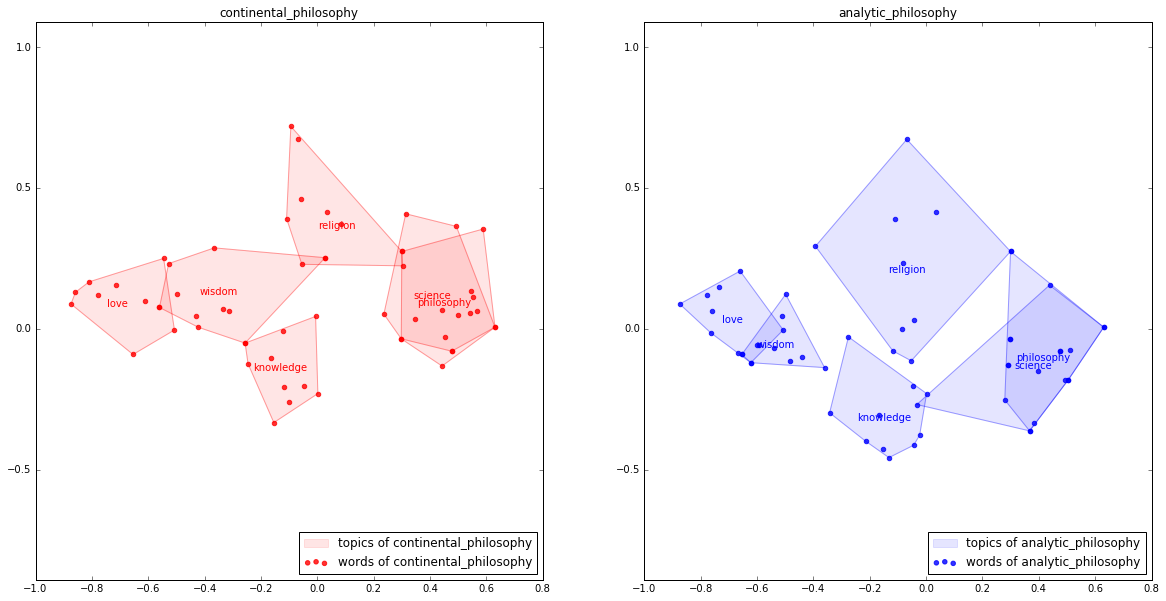

In [27]:
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1), sharex=ax1, sharey=ax1)

plot_words(ax1, pca, [s2], label=True, legend=True, topn=current_topn)
plot_words(ax2, pca, [s3], label=True, legend=True, topn=current_topn)

plt.show()

### n = 15

In [12]:
current_topn=15

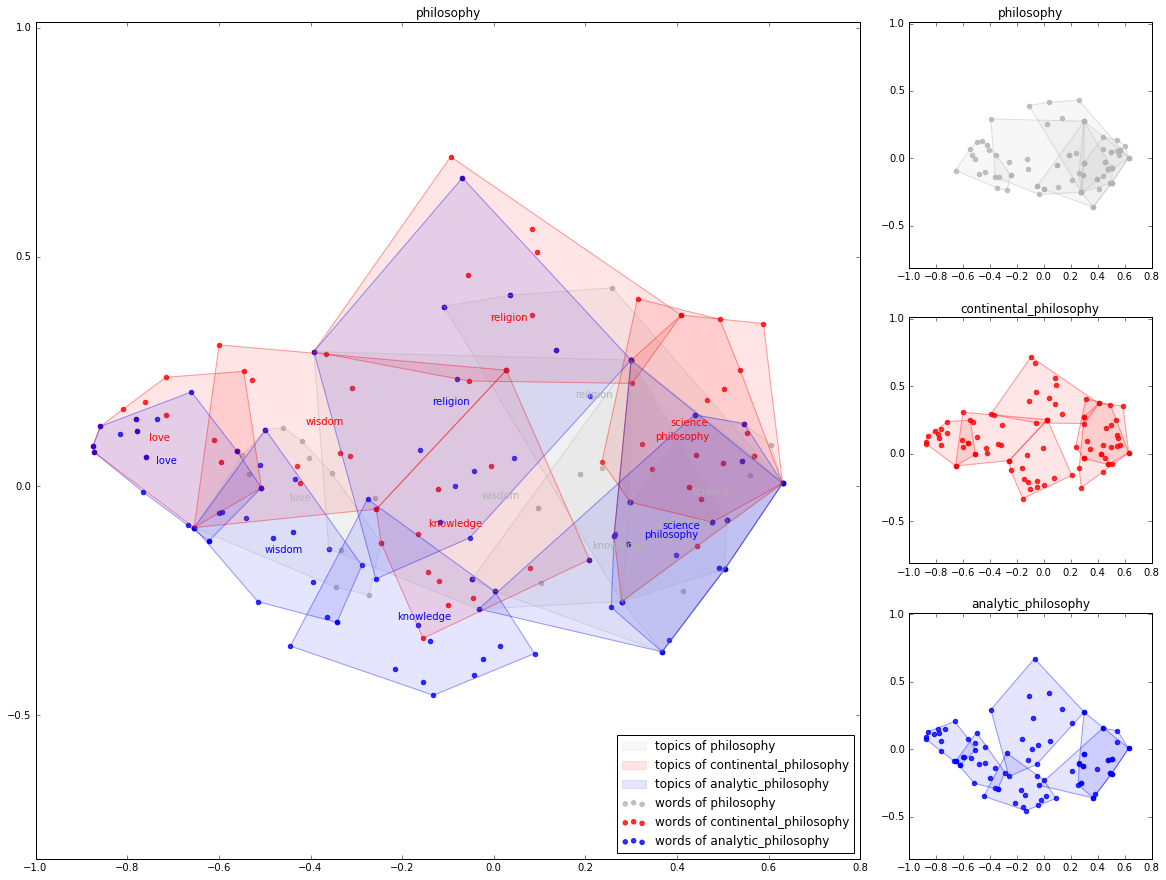

In [14]:
fig = plt.figure(figsize=(20,15))

ax1 = plt.subplot2grid((3,4), (0, 0), rowspan=3, colspan=3)
ax2 = plt.subplot2grid((3,4), (0, 3), sharex=ax1, sharey=ax1)
ax3 = plt.subplot2grid((3,4), (1, 3), sharex=ax1, sharey=ax1)
ax4 = plt.subplot2grid((3,4), (2, 3), sharex=ax1, sharey=ax1)
        
plot_words(ax1, pca, [s1]+[s2]+[s3], label=True, legend=True, topn=current_topn)
plot_words(ax2, pca, [s1], topn=current_topn)
plot_words(ax3, pca, [s2], topn=current_topn)
plot_words(ax4, pca, [s3], topn=current_topn)


plt.show()

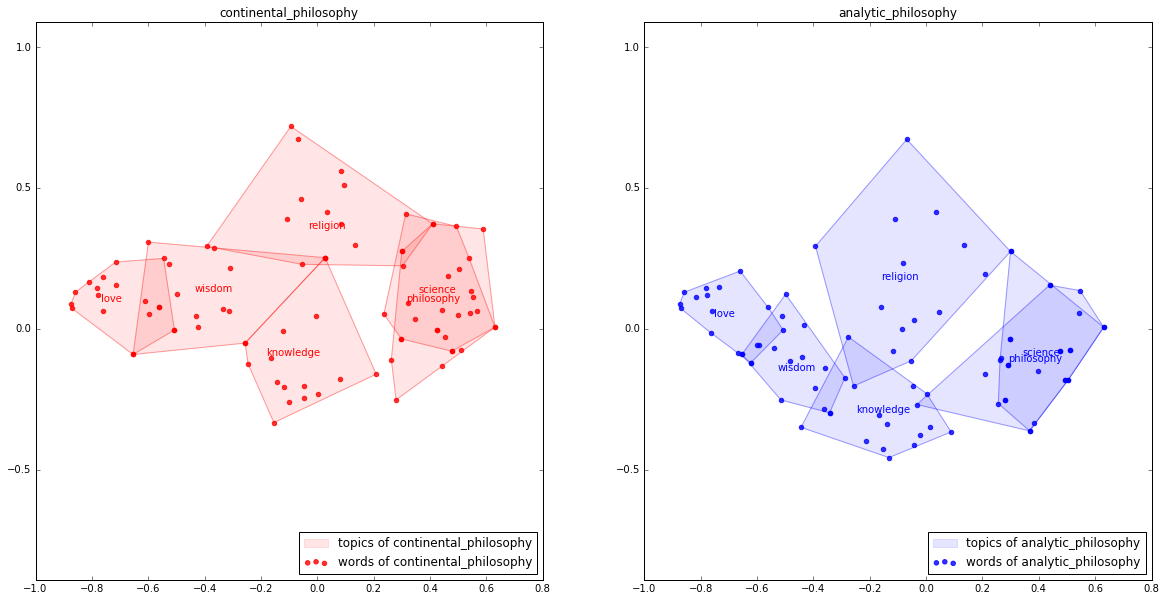

In [15]:
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1), sharex=ax1, sharey=ax1)

plot_words(ax1, pca, [s2], label=True, legend=True, topn=current_topn)
plot_words(ax2, pca, [s3], label=True, legend=True, topn=current_topn)

plt.show()

### n = 20

In [16]:
current_topn=20

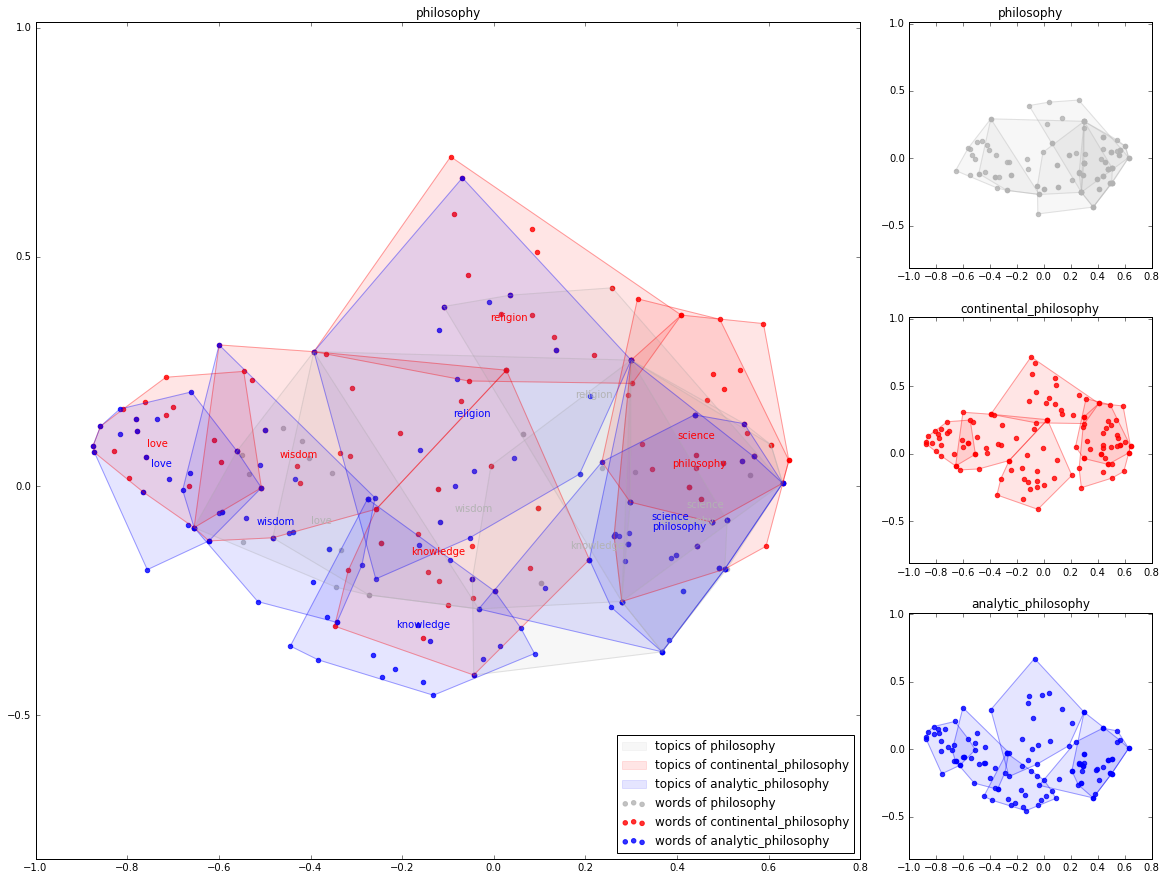

In [18]:
fig = plt.figure(figsize=(20,15))

ax1 = plt.subplot2grid((3,4), (0, 0), rowspan=3, colspan=3)
ax2 = plt.subplot2grid((3,4), (0, 3), sharex=ax1, sharey=ax1)
ax3 = plt.subplot2grid((3,4), (1, 3), sharex=ax1, sharey=ax1)
ax4 = plt.subplot2grid((3,4), (2, 3), sharex=ax1, sharey=ax1)
        
plot_words(ax1, pca, [s1]+[s2]+[s3], label=True, legend=True, topn=current_topn)
plot_words(ax2, pca, [s1], topn=current_topn)
plot_words(ax3, pca, [s2], topn=current_topn)
plot_words(ax4, pca, [s3], topn=current_topn)


plt.show()

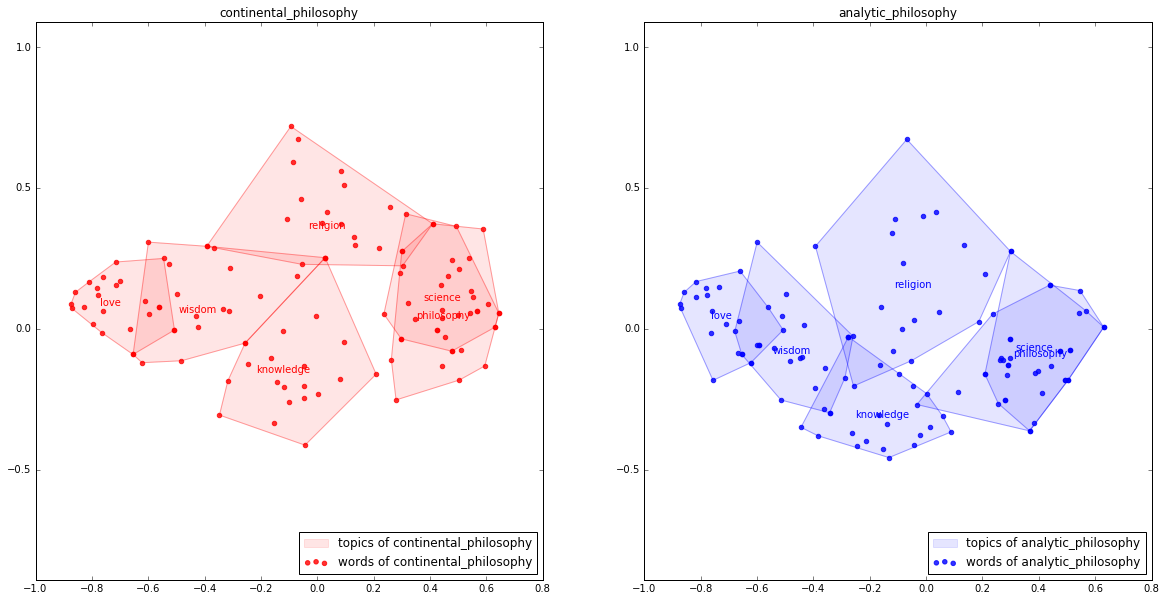

In [19]:
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1), sharex=ax1, sharey=ax1)

plot_words(ax1, pca, [s2], label=True, legend=True, topn=current_topn)
plot_words(ax2, pca, [s3], label=True, legend=True, topn=current_topn)

plt.show()

### n = 30

In [20]:
current_topn=30

In [21]:
s1 = partitions[0] + [ ".70" ]
s2 = partitions[1] + [ "red" ]
s3 = partitions[2] + [ "blue" ]

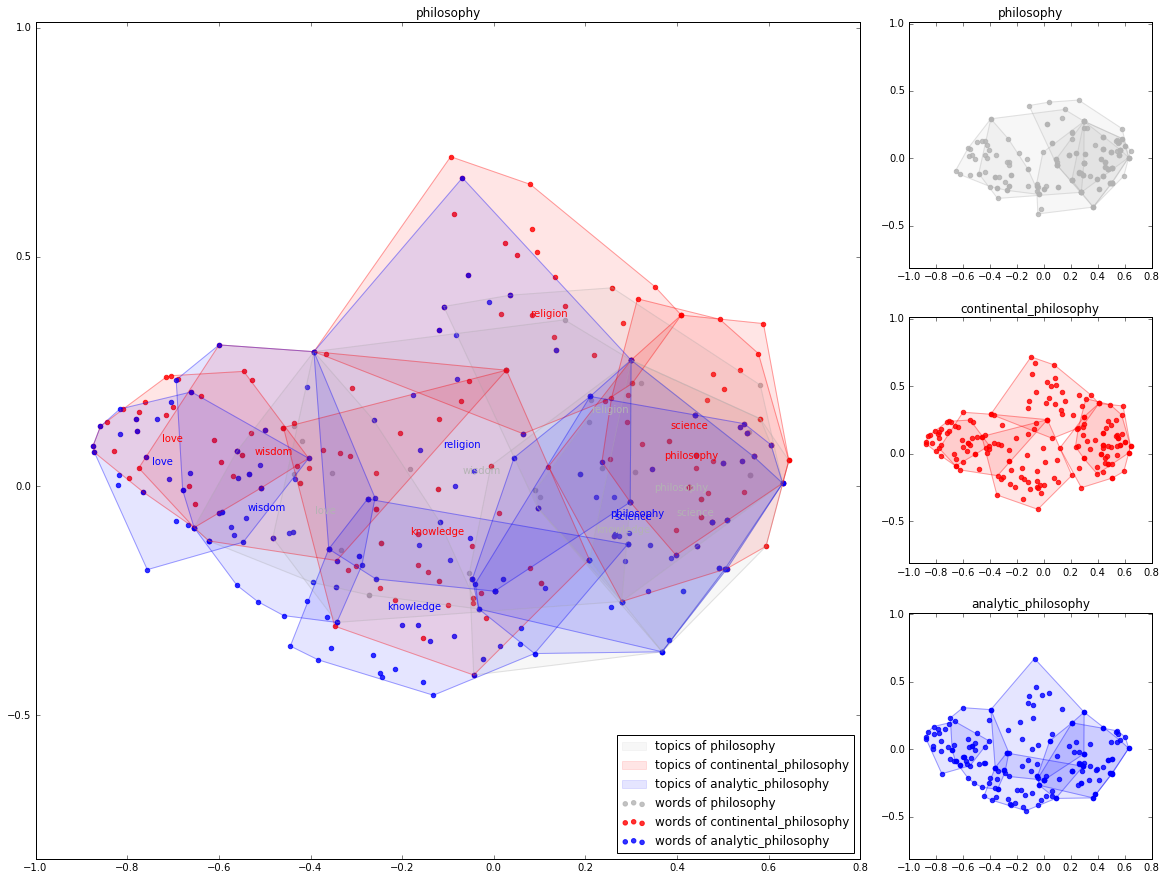

In [22]:
fig = plt.figure(figsize=(20,15))

ax1 = plt.subplot2grid((3,4), (0, 0), rowspan=3, colspan=3)
ax2 = plt.subplot2grid((3,4), (0, 3), sharex=ax1, sharey=ax1)
ax3 = plt.subplot2grid((3,4), (1, 3), sharex=ax1, sharey=ax1)
ax4 = plt.subplot2grid((3,4), (2, 3), sharex=ax1, sharey=ax1)
        
plot_words(ax1, pca, [s1]+[s2]+[s3], label=True, legend=True, topn=current_topn)
plot_words(ax2, pca, [s1], topn=current_topn)
plot_words(ax3, pca, [s2], topn=current_topn)
plot_words(ax4, pca, [s3], topn=current_topn)


plt.show()

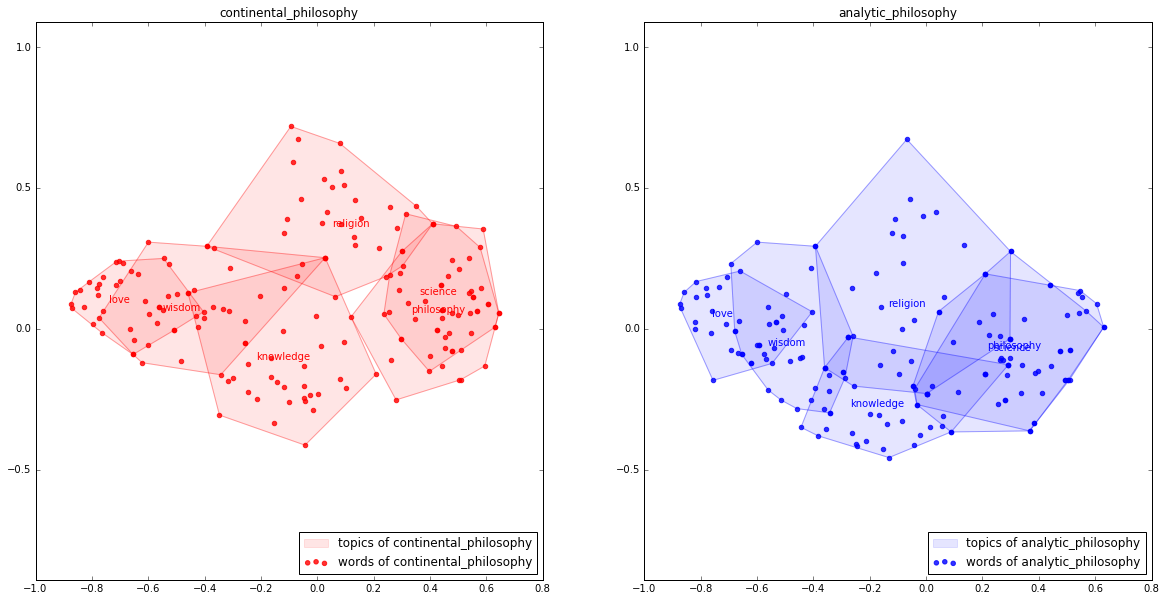

In [23]:
fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1), sharex=ax1, sharey=ax1)

plot_words(ax1, pca, [s2], label=True, legend=True, topn=current_topn)
plot_words(ax2, pca, [s3], label=True, legend=True, topn=current_topn)

plt.show()